In [77]:
import pandas as pd
import mysql.connector as sql
import streamlit as st
import plotly.express as px
import os
import json
from streamlit_option_menu import option_menu
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [61]:


#Dataframe of aggregated Transactions

path1 ="C:/Phonepe_project/pulse-master/pulse-master/data/aggregated/transaction/country/india/state/"
agg_trans_list = os.listdir(path1)

columns1 = {'State': [], 'Year': [], 'Quarter': [], 'Transaction_type': [], 'Transaction_count': [],
            'Transaction_amount': []}
for state in agg_trans_list:
    cur_state = path1 + state + "/"
    agg_year_list = os.listdir(cur_state)
    
    for year in agg_year_list:
        cur_year = cur_state + year + "/"
        agg_file_list = os.listdir(cur_year)
        
        for file in agg_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            A = json.load(data)
            
            for i in A['data']['transactionData']:
                name = i['name']
                count = i['paymentInstruments'][0]['count']
                amount = i['paymentInstruments'][0]['amount']
                columns1['Transaction_type'].append(name)
                columns1['Transaction_count'].append(count)
                columns1['Transaction_amount'].append(amount)
                columns1['State'].append(state)
                columns1['Year'].append(year)
                columns1['Quarter'].append(int(file.strip('.json')))
                
df_agg_trans = pd.DataFrame(columns1)

In [62]:
df_agg_trans['State'] = df_agg_trans['State'].replace({'andaman-&-nicobar-islands': 'Andaman & Nicobar Island','andhra-pradesh':'Andhra Pradesh', 'arunachal-pradesh':'Arunanchal Pradesh',
       'assam':'Assam', 'bihar':'Bihar', 'chandigarh':'Chandigarh', 'chhattisgarh':'Chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu':'Dadra and Nagar Haveli and Daman and Diu', 'delhi': 'Delhi', 'goa':'Goa', 'gujarat': 'Gujarat',
       'haryana':'Haryana','himachal-pradesh':'Himachal Pradesh', 'jammu-&-kashmir':'Jammu & Kashmir', 'jharkhand':'Jharkhand',
       'karnataka':'Karnataka', 'kerala':'Kerala', 'ladakh':'Ladakh', 'lakshadweep':'Lakshadweep', 'madhya-pradesh':'Madhya Pradesh',
       'maharashtra':'Maharashtra', 'manipur':'Manipur', 'meghalaya':'Meghalaya', 'mizoram':'Mizoram', 'nagaland':'Nagaland',
       'odisha':'Odisha', 'puducherry':'Puducherry', 'punjab':'Punjab', 'rajasthan':'Rajasthan', 'sikkim':'Sikkim',
       'tamil-nadu': 'Tamil Nadu', 'telangana':'Telangana',
'tripura':'Tripura', 'uttar-pradesh':'Uttar Pradesh',
       'uttarakhand':'Uttarakhand', 'west-bengal':'West Bengal'})

In [63]:
df_agg_trans

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,Andaman & Nicobar Island,2018,1,Recharge & bill payments,4200,1.845307e+06
1,Andaman & Nicobar Island,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,Andaman & Nicobar Island,2018,1,Merchant payments,298,4.525072e+05
3,Andaman & Nicobar Island,2018,1,Financial Services,33,1.060142e+04
4,Andaman & Nicobar Island,2018,1,Others,256,1.846899e+05
...,...,...,...,...,...,...
3589,West Bengal,2022,4,Peer-to-peer payments,184380244,6.202222e+11
3590,West Bengal,2022,4,Merchant payments,171667404,1.408077e+11
3591,West Bengal,2022,4,Recharge & bill payments,48921147,2.602663e+10
3592,West Bengal,2022,4,Financial Services,268388,2.611229e+08


In [68]:
bcd=df_agg_trans['State']

In [69]:
bcd

0       Andaman & Nicobar Island
1       Andaman & Nicobar Island
2       Andaman & Nicobar Island
3       Andaman & Nicobar Island
4       Andaman & Nicobar Island
                  ...           
3589                 West Bengal
3590                 West Bengal
3591                 West Bengal
3592                 West Bengal
3593                 West Bengal
Name: State, Length: 3594, dtype: object

In [ ]:
# bcd = df_nested_list["data.hoverDataList.name"].str.replace(r'(\w+)', lambda x: x.group().capitalize(),n=2, regex=True)

In [7]:
df_agg_trans

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,Andaman & Nicobar Island,2018,1,Recharge & bill payments,4200,1.845307e+06
1,Andaman & Nicobar Island,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,Andaman & Nicobar Island,2018,1,Merchant payments,298,4.525072e+05
3,Andaman & Nicobar Island,2018,1,Financial Services,33,1.060142e+04
4,Andaman & Nicobar Island,2018,1,Others,256,1.846899e+05
...,...,...,...,...,...,...
3589,West Bengal,2022,4,Peer-to-peer payments,184380244,6.202222e+11
3590,West Bengal,2022,4,Merchant payments,171667404,1.408077e+11
3591,West Bengal,2022,4,Recharge & bill payments,48921147,2.602663e+10
3592,West Bengal,2022,4,Financial Services,268388,2.611229e+08


In [25]:
#Dataframe of aggregated user

path2 = "C:/Phonepe_project/pulse-master/pulse-master/data/aggregated/user/country/india/state/"

agg_user_list = os.listdir(path2)

columns2 = {'State': [], 'Year': [], 'Quarter': [], 'Brands': [], 'Count': [],
            'Percentage': []}
for state in agg_user_list:
    cur_state = path2 + state + "/"
    agg_year_list = os.listdir(cur_state)
    
    for year in agg_year_list:
        cur_year = cur_state + year + "/"
        agg_file_list = os.listdir(cur_year)

        for file in agg_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            B = json.load(data)
            try:
                for i in B["data"]["usersByDevice"]:
                    brand_name = i["brand"]
                    counts = i["count"]
                    percents = i["percentage"]
                    columns2["Brands"].append(brand_name)
                    columns2["Count"].append(counts)
                    columns2["Percentage"].append(percents)
                    columns2["State"].append(state)
                    columns2["Year"].append(year)
                    columns2["Quarter"].append(int(file.strip('.json')))
            except:
                pass
df_agg_user = pd.DataFrame(columns2)

In [26]:
df_agg_user['State'] = df_agg_user['State'].replace({'andaman-&-nicobar-islands': 'Andaman & Nicobar Island','andhra-pradesh':'Andhra Pradesh', 'arunachal-pradesh':'Arunanchal Pradesh',
       'assam':'Assam', 'bihar':'Bihar', 'chandigarh':'Chandigarh', 'chhattisgarh':'Chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu':'Dadra and Nagar Haveli and Daman and Diu', 'delhi': 'Delhi', 'goa':'Goa', 'gujarat': 'Gujarat',
       'haryana':'Haryana','himachal-pradesh':'Himachal Pradesh', 'jammu-&-kashmir':'Jammu & Kashmir', 'jharkhand':'Jharkhand',
       'karnataka':'Karnataka', 'kerala':'Kerala', 'ladakh':'Ladakh', 'lakshadweep':'Lakshadweep', 'madhya-pradesh':'Madhya Pradesh',
       'maharashtra':'Maharashtra', 'manipur':'Manipur', 'meghalaya':'Meghalaya', 'mizoram':'Mizoram', 'nagaland':'Nagaland',
       'odisha':'Odisha', 'puducherry':'Puducherry', 'punjab':'Punjab', 'rajasthan':'Rajasthan', 'sikkim':'Sikkim',
       'tamil-nadu': 'Tamil Nadu', 'telangana':'Telangana',
'tripura':'Tripura', 'uttar-pradesh':'Uttar Pradesh',
       'uttarakhand':'Uttarakhand', 'west-bengal':'West Bengal'})

In [27]:
df_agg_user

,State,Year,Quarter,Brands,Count,Percentage
0,Andaman & Nicobar Island,2018,1,Xiaomi,1665,0.247033
1,Andaman & Nicobar Island,2018,1,Samsung,1445,0.214392
2,Andaman & Nicobar Island,2018,1,Vivo,982,0.145697
3,Andaman & Nicobar Island,2018,1,Oppo,501,0.074332
4,Andaman & Nicobar Island,2018,1,OnePlus,332,0.049258
...,...,...,...,...,...,...
6727,West Bengal,2022,1,Lenovo,330017,0.015056
6728,West Bengal,2022,1,Infinix,284678,0.012987
6729,West Bengal,2022,1,Asus,280347,0.012790
6730,West Bengal,2022,1,Apple,277752,0.012671


In [28]:
#Dataframe of map transactions

path3 = "C:/Phonepe_project/pulse-master/pulse-master/data/map/transaction/hover/country/india/state/"

map_trans_list = os.listdir(path3)

columns3 = {'State': [], 'Year': [], 'Quarter': [], 'District': [], 'Count': [],
            'Amount': []}

for state in map_trans_list:
    cur_state = path3 + state + "/"
    map_year_list = os.listdir(cur_state)
    
    for year in map_year_list:
        cur_year = cur_state + year + "/"
        map_file_list = os.listdir(cur_year)
        
        for file in map_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            C = json.load(data)
            
            for i in C["data"]["hoverDataList"]:
                district = i["name"]
                count = i["metric"][0]["count"]
                amount = i["metric"][0]["amount"]
                columns3["District"].append(district)
                columns3["Count"].append(count)
                columns3["Amount"].append(amount)
                columns3['State'].append(state)
                columns3['Year'].append(year)
                columns3['Quarter'].append(int(file.strip('.json')))
                
df_map_trans = pd.DataFrame(columns3)

In [29]:
df_map_trans['State'] = df_map_trans['State'].replace({'andaman-&-nicobar-islands': 'Andaman & Nicobar Island','andhra-pradesh':'Andhra Pradesh', 'arunachal-pradesh':'Arunanchal Pradesh',
       'assam':'Assam', 'bihar':'Bihar', 'chandigarh':'Chandigarh', 'chhattisgarh':'Chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu':'Dadra and Nagar Haveli and Daman and Diu', 'delhi': 'Delhi', 'goa':'Goa', 'gujarat': 'Gujarat',
       'haryana':'Haryana','himachal-pradesh':'Himachal Pradesh', 'jammu-&-kashmir':'Jammu & Kashmir', 'jharkhand':'Jharkhand',
       'karnataka':'Karnataka', 'kerala':'Kerala', 'ladakh':'Ladakh', 'lakshadweep':'Lakshadweep', 'madhya-pradesh':'Madhya Pradesh',
       'maharashtra':'Maharashtra', 'manipur':'Manipur', 'meghalaya':'Meghalaya', 'mizoram':'Mizoram', 'nagaland':'Nagaland',
       'odisha':'Odisha', 'puducherry':'Puducherry', 'punjab':'Punjab', 'rajasthan':'Rajasthan', 'sikkim':'Sikkim',
       'tamil-nadu': 'Tamil Nadu', 'telangana':'Telangana',
'tripura':'Tripura', 'uttar-pradesh':'Uttar Pradesh',
       'uttarakhand':'Uttarakhand', 'west-bengal':'West Bengal'})

In [30]:
df_map_trans

,State,Year,Quarter,District,Count,Amount
0,Andaman & Nicobar Island,2018,1,north and middle andaman district,442,9.316631e+05
1,Andaman & Nicobar Island,2018,1,south andaman district,5688,1.256025e+07
2,Andaman & Nicobar Island,2018,1,nicobars district,528,1.139849e+06
3,Andaman & Nicobar Island,2018,2,north and middle andaman district,825,1.317863e+06
4,Andaman & Nicobar Island,2018,2,south andaman district,9395,2.394824e+07
...,...,...,...,...,...,...
14631,West Bengal,2022,4,nadia district,12690126,2.804568e+10
14632,West Bengal,2022,4,birbhum district,7617444,1.614650e+10
14633,West Bengal,2022,4,purba medinipur district,14484229,3.309949e+10
14634,West Bengal,2022,4,maldah district,12492746,2.721861e+10


In [70]:
abc=df_map_trans['District']

In [71]:
abc

0        north and middle andaman district
1                   south andaman district
2                        nicobars district
3        north and middle andaman district
4                   south andaman district
                       ...                
14631                       nadia district
14632                     birbhum district
14633             purba medinipur district
14634                      maldah district
14635                   darjiling district
Name: District, Length: 14636, dtype: object

In [75]:
ab=df_map_trans['Count']

In [76]:
ab

0             442
1            5688
2             528
3             825
4            9395
           ...   
14631    12690126
14632     7617444
14633    14484229
14634    12492746
14635     8827502
Name: Count, Length: 14636, dtype: int64

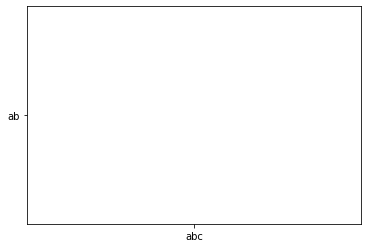

In [84]:
x = np.array(['abc'])
y = np.array(['ab'])
plt.bar(x,y)
plt.show()

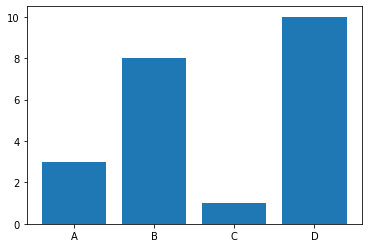

In [83]:

x = np.array(["A", "B", "C", "D"])
y = np.array([3, 8, 1, 10])

plt.bar(x,y)
plt.show()

In [31]:
#Dataframe of map user


path4 = "C:/Phonepe_project/pulse-master/pulse-master/data/map/user/hover/country/india/state/"

map_user_list = os.listdir(path4)

columns4 = {"State": [], "Year": [], "Quarter": [], "District": [],
            "RegisteredUser": [], "AppOpens": []}

for state in map_user_list:
    cur_state = path4 + state + "/"
    map_year_list = os.listdir(cur_state)
    
    for year in map_year_list:
        cur_year = cur_state + year + "/"
        map_file_list = os.listdir(cur_year)
        
        for file in map_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            D = json.load(data)
            
            for i in D["data"]["hoverData"].items():
                district = i[0]
                registereduser = i[1]["registeredUsers"]
                appOpens = i[1]['appOpens']
                columns4["District"].append(district)
                columns4["RegisteredUser"].append(registereduser)
                columns4["AppOpens"].append(appOpens)
                columns4['State'].append(state)
                columns4['Year'].append(year)
                columns4['Quarter'].append(int(file.strip('.json')))
                
df_map_user = pd.DataFrame(columns4)

In [32]:
df_map_user['State'] = df_map_user['State'].replace({'andaman-&-nicobar-islands': 'Andaman & Nicobar Island','andhra-pradesh':'Andhra Pradesh', 'arunachal-pradesh':'Arunanchal Pradesh',
       'assam':'Assam', 'bihar':'Bihar', 'chandigarh':'Chandigarh', 'chhattisgarh':'Chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu':'Dadra and Nagar Haveli and Daman and Diu', 'delhi': 'Delhi', 'goa':'Goa', 'gujarat': 'Gujarat',
       'haryana':'Haryana','himachal-pradesh':'Himachal Pradesh', 'jammu-&-kashmir':'Jammu & Kashmir', 'jharkhand':'Jharkhand',
       'karnataka':'Karnataka', 'kerala':'Kerala', 'ladakh':'Ladakh', 'lakshadweep':'Lakshadweep', 'madhya-pradesh':'Madhya Pradesh',
       'maharashtra':'Maharashtra', 'manipur':'Manipur', 'meghalaya':'Meghalaya', 'mizoram':'Mizoram', 'nagaland':'Nagaland',
       'odisha':'Odisha', 'puducherry':'Puducherry', 'punjab':'Punjab', 'rajasthan':'Rajasthan', 'sikkim':'Sikkim',
       'tamil-nadu': 'Tamil Nadu', 'telangana':'Telangana',
'tripura':'Tripura', 'uttar-pradesh':'Uttar Pradesh',
       'uttarakhand':'Uttarakhand', 'west-bengal':'West Bengal'})

In [33]:
df_map_user

,State,Year,Quarter,District,RegisteredUser,AppOpens
0,Andaman & Nicobar Island,2018,1,north and middle andaman district,632,0
1,Andaman & Nicobar Island,2018,1,south andaman district,5846,0
2,Andaman & Nicobar Island,2018,1,nicobars district,262,0
3,Andaman & Nicobar Island,2018,2,north and middle andaman district,911,0
4,Andaman & Nicobar Island,2018,2,south andaman district,8143,0
...,...,...,...,...,...,...
14635,West Bengal,2022,4,nadia district,1359420,33853990
14636,West Bengal,2022,4,birbhum district,855236,20950662
14637,West Bengal,2022,4,purba medinipur district,1346908,38278506
14638,West Bengal,2022,4,maldah district,954892,29023743


In [34]:
#Dataframe of top transactions

path5 = "C:/Phonepe_project/pulse-master/pulse-master/data/top/transaction/country/india/state/"

top_trans_list = os.listdir(path5)
columns5 = {'State': [], 'Year': [], 'Quarter': [], 'Pincode': [], 'Transaction_count': [],
            'Transaction_amount': []}

for state in top_trans_list:
    cur_state = path5 + state + "/"
    top_year_list = os.listdir(cur_state)
    
    for year in top_year_list:
        cur_year = cur_state + year + "/"
        top_file_list = os.listdir(cur_year)
        
        for file in top_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            E = json.load(data)
            
            for i in E['data']['pincodes']:
                name = i['entityName']
                count = i['metric']['count']
                amount = i['metric']['amount']
                columns5['Pincode'].append(name)
                columns5['Transaction_count'].append(count)
                columns5['Transaction_amount'].append(amount)
                columns5['State'].append(state)
                columns5['Year'].append(year)
                columns5['Quarter'].append(int(file.strip('.json')))
df_top_trans = pd.DataFrame(columns5)

In [35]:
df_top_trans['State'] = df_top_trans['State'].replace({'andaman-&-nicobar-islands': 'Andaman & Nicobar Island','andhra-pradesh':'Andhra Pradesh', 'arunachal-pradesh':'Arunanchal Pradesh',
       'assam':'Assam', 'bihar':'Bihar', 'chandigarh':'Chandigarh', 'chhattisgarh':'Chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu':'Dadra and Nagar Haveli and Daman and Diu', 'delhi': 'Delhi', 'goa':'Goa', 'gujarat': 'Gujarat',
       'haryana':'Haryana','himachal-pradesh':'Himachal Pradesh', 'jammu-&-kashmir':'Jammu & Kashmir', 'jharkhand':'Jharkhand',
       'karnataka':'Karnataka', 'kerala':'Kerala', 'ladakh':'Ladakh', 'lakshadweep':'Lakshadweep', 'madhya-pradesh':'Madhya Pradesh',
       'maharashtra':'Maharashtra', 'manipur':'Manipur', 'meghalaya':'Meghalaya', 'mizoram':'Mizoram', 'nagaland':'Nagaland',
       'odisha':'Odisha', 'puducherry':'Puducherry', 'punjab':'Punjab', 'rajasthan':'Rajasthan', 'sikkim':'Sikkim',
       'tamil-nadu': 'Tamil Nadu', 'telangana':'Telangana',
'tripura':'Tripura', 'uttar-pradesh':'Uttar Pradesh',
       'uttarakhand':'Uttarakhand', 'west-bengal':'West Bengal'})

In [36]:
df_top_trans

,State,Year,Quarter,Pincode,Transaction_count,Transaction_amount
0,Andaman & Nicobar Island,2018,1,744101,1622,2.769298e+06
1,Andaman & Nicobar Island,2018,1,744103,1223,2.238042e+06
2,Andaman & Nicobar Island,2018,1,744102,969,3.519060e+06
3,Andaman & Nicobar Island,2018,1,744105,685,1.298561e+06
4,Andaman & Nicobar Island,2018,1,744104,340,1.039715e+06
...,...,...,...,...,...,...
7134,West Bengal,2022,4,722101,2900058,5.748321e+09
7135,West Bengal,2022,4,700135,2471048,3.527457e+09
7136,West Bengal,2022,4,732101,2407008,5.052109e+09
7137,West Bengal,2022,4,700091,2348447,2.176640e+09


In [37]:
#Dataframe of top users

path6 = "C:/Phonepe_project/pulse-master/pulse-master/data/top/user/country/india/state/"
top_user_list = os.listdir(path6)
columns6 = {'State': [], 'Year': [], 'Quarter': [], 'Pincode': [],
            'RegisteredUsers': []}

for state in top_user_list:
    cur_state = path6 + state + "/"
    top_year_list = os.listdir(cur_state)
    
    for year in top_year_list:
        cur_year = cur_state + year + "/"
        top_file_list = os.listdir(cur_year)
        
        for file in top_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            F = json.load(data)
            
            for i in F['data']['pincodes']:
                name = i['name']
                registeredUsers = i['registeredUsers']
                columns6['Pincode'].append(name)
                columns6['RegisteredUsers'].append(registeredUsers)
                columns6['State'].append(state)
                columns6['Year'].append(year)
                columns6['Quarter'].append(int(file.strip('.json')))
df_top_user = pd.DataFrame(columns6)  

In [38]:
df_top_user['State'] = df_top_user['State'].replace({'andaman-&-nicobar-islands': 'Andaman & Nicobar Island','andhra-pradesh':'Andhra Pradesh', 'arunachal-pradesh':'Arunanchal Pradesh',
       'assam':'Assam', 'bihar':'Bihar', 'chandigarh':'Chandigarh', 'chhattisgarh':'Chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu':'Dadra and Nagar Haveli and Daman and Diu', 'delhi': 'Delhi', 'goa':'Goa', 'gujarat': 'Gujarat',
       'haryana':'Haryana','himachal-pradesh':'Himachal Pradesh', 'jammu-&-kashmir':'Jammu & Kashmir', 'jharkhand':'Jharkhand',
       'karnataka':'Karnataka', 'kerala':'Kerala', 'ladakh':'Ladakh', 'lakshadweep':'Lakshadweep', 'madhya-pradesh':'Madhya Pradesh',
       'maharashtra':'Maharashtra', 'manipur':'Manipur', 'meghalaya':'Meghalaya', 'mizoram':'Mizoram', 'nagaland':'Nagaland',
       'odisha':'Odisha', 'puducherry':'Puducherry', 'punjab':'Punjab', 'rajasthan':'Rajasthan', 'sikkim':'Sikkim',
       'tamil-nadu': 'Tamil Nadu', 'telangana':'Telangana',
'tripura':'Tripura', 'uttar-pradesh':'Uttar Pradesh',
       'uttarakhand':'Uttarakhand', 'west-bengal':'West Bengal'})

In [39]:
df_top_user 

,State,Year,Quarter,Pincode,RegisteredUsers
0,Andaman & Nicobar Island,2018,1,744103,1608
1,Andaman & Nicobar Island,2018,1,744101,1108
2,Andaman & Nicobar Island,2018,1,744105,1075
3,Andaman & Nicobar Island,2018,1,744102,1006
4,Andaman & Nicobar Island,2018,1,744104,272
...,...,...,...,...,...
7135,West Bengal,2022,4,700015,108457
7136,West Bengal,2022,4,742304,105471
7137,West Bengal,2022,4,721101,105279
7138,West Bengal,2022,4,700091,102363


In [40]:
df_agg_trans.to_csv('agg_trans.csv',index=False)
df_agg_user.to_csv('agg_user.csv',index=False)
df_map_trans.to_csv('map_trans.csv',index=False)
df_map_user.to_csv('map_user.csv',index=False)
df_top_trans.to_csv('top_trans.csv',index=False)
df_top_user.to_csv('top_user.csv',index=False)

In [41]:
mydb = sql.connect(host="localhost",
                   user="root",
                   password="Gvk886723",
                   database= "phonepe_pulsar"
                  )
mycursor = mydb.cursor(buffered=True)

AttributeError: 'str' object has no attribute 'connect'

In [51]:
#Creating agg_trans table
mycursor.execute("create table agg_trans (State varchar(100), Year int, Quarter int, Transaction_type varchar(100), Transaction_count int, Transaction_amount double)")

for i,row in df_agg_trans.iterrows():
    #here %S means string values 
    sql = "INSERT INTO agg_trans VALUES (%s,%s,%s,%s,%s,%s)"
    mycursor.execute(sql, tuple(row))
    # the connection is not auto committed by default, so we must commit to save our changes
    mydb.commit()

ProgrammingError: 1050 (42S01): Table 'agg_trans' already exists

In [48]:
#Creating agg_user table

mycursor.execute("create table agg_user (State varchar(100), Year int, Quarter int, Brands varchar(100), Count int, Percentage double)")

for i,row in df_agg_user.iterrows():
    sql = "INSERT INTO agg_user VALUES (%s,%s,%s,%s,%s,%s)"
    mycursor.execute(sql, tuple(row))
    mydb.commit()

In [43]:
#Creating map_trans table

mycursor.execute("create table map_trans (State varchar(100), Year int, Quarter int, District varchar(100), Count int, Amount double)")

for i,row in df_map_trans.iterrows():
    sql = "INSERT INTO map_trans VALUES (%s,%s,%s,%s,%s,%s)"
    mycursor.execute(sql, tuple(row))
    mydb.commit()

In [44]:
#Creating map_user table

mycursor.execute("create table map_user (State varchar(100), Year int, Quarter int, District varchar(100), Registered_user int, App_opens int)")

for i,row in df_map_user.iterrows():
    sql = "INSERT INTO map_user VALUES (%s,%s,%s,%s,%s,%s)"
    mycursor.execute(sql, tuple(row))
    mydb.commit()

In [45]:
# Creating top_trans table

mycursor.execute("create table top_trans (State varchar(100), Year int, Quarter int, Pincode int, Transaction_count int, Transaction_amount double)")

for i,row in df_top_trans.iterrows():
    sql = "INSERT INTO top_trans VALUES (%s,%s,%s,%s,%s,%s)"
    mycursor.execute(sql, tuple(row))
    mydb.commit()

In [46]:
#Creating top_user table

mycursor.execute("create table top_user (State varchar(100), Year int, Quarter int, Pincode int, Registered_users int)")

for i,row in df_top_user.iterrows():
    sql = "INSERT INTO top_user VALUES (%s,%s,%s,%s,%s)"
    mycursor.execute(sql, tuple(row))
    mydb.commit()

In [50]:
mycursor.execute("show tables")
mycursor.fetchall()

[('agg_trans',),
 ('agg_user',),
 ('map_trans',),
 ('map_user',),
 ('pho',),
 ('pho1',),
 ('q1',),
 ('top_trans',),
 ('top_user',),
 ('trans_2018_1',),
 ('trans_2018_2',),
 ('trans_2018_3',),
 ('trans_2018_4',),
 ('u_3',)]